In [1]:
import xgboost

In [7]:
import pandas as pd
from xgboost import XGBClassifier

data = pd.read_csv('diabetes.csv')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


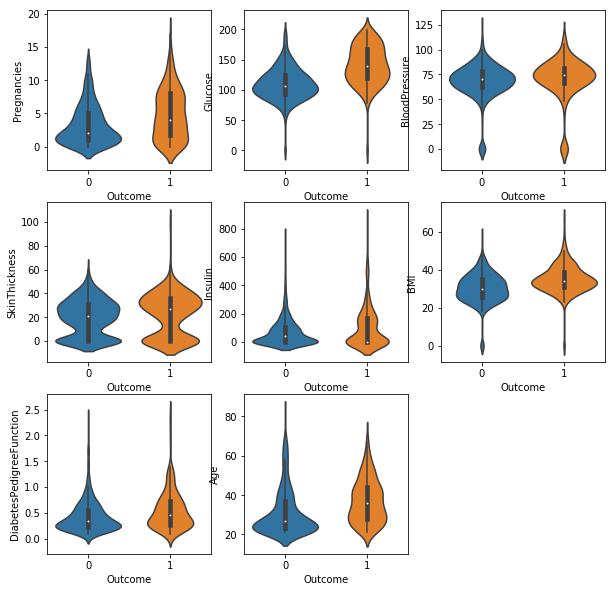

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (10,10))
for index,column in enumerate(data.columns):
    if column == 'Outcome':
        continue
    plt.subplot(3,3,index+1)
    sns.violinplot(x ='Outcome',y=column,data = data)

In [11]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [40]:
from sklearn import metrics
from sklearn.model_selection import train_test_split

input_column = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']
train_input,test_input,train_output,test_output = train_test_split(data[input_column].values,data['Outcome'].values,train_size = 0.75)
train_input,eval_input,train_output,eval_output = train_test_split(train_input,train_output,train_size = 0.9)

In [64]:
xgb = XGBClassifier(learning_rate= 0.101771)

In [65]:
eval_set = [(eval_input,eval_output)]
xgb.fit(train_input,train_output,early_stopping_rounds=10,eval_metric= "logloss", eval_set = eval_set)

[0]	validation_0-logloss:0.672978
Will train until validation_0-logloss hasn't improved in 10 rounds.
[1]	validation_0-logloss:0.654954
[2]	validation_0-logloss:0.628472
[3]	validation_0-logloss:0.619916
[4]	validation_0-logloss:0.612757
[5]	validation_0-logloss:0.598003
[6]	validation_0-logloss:0.592094
[7]	validation_0-logloss:0.589401
[8]	validation_0-logloss:0.588777
[9]	validation_0-logloss:0.583939
[10]	validation_0-logloss:0.577162
[11]	validation_0-logloss:0.577099
[12]	validation_0-logloss:0.578162
[13]	validation_0-logloss:0.570998
[14]	validation_0-logloss:0.566015
[15]	validation_0-logloss:0.566696
[16]	validation_0-logloss:0.565625
[17]	validation_0-logloss:0.568725
[18]	validation_0-logloss:0.567464
[19]	validation_0-logloss:0.56502
[20]	validation_0-logloss:0.568339
[21]	validation_0-logloss:0.562246
[22]	validation_0-logloss:0.559939
[23]	validation_0-logloss:0.561211
[24]	validation_0-logloss:0.561932
[25]	validation_0-logloss:0.566758
[26]	validation_0-logloss:0.56902

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.101771, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [66]:
predict_label = xgb.predict(test_input)

In [67]:
metrics.accuracy_score(test_output,predict_label)

0.765625

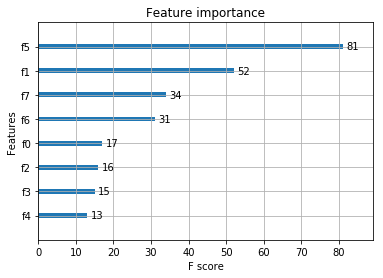

In [45]:
from xgboost import plot_importance
plot_importance(xgb)
plt.show()

In [54]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
import numpy as np



In [62]:
lr = 0.1 + 0.01*np.random.randn(4)
#lr = [0.01,0.1]
param_grid = dict(learning_rate = lr)

kfold = StratifiedKFold(n_splits=10,random_state=7)
model = XGBClassifier()
grid_search = GridSearchCV(model,param_grid,scoring="neg_log_loss",cv = kfold)
grid_result = grid_search.fit(train_input,train_output)

D:\anaconda\envs\py35\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [63]:
grid_result.best_params_

{'learning_rate': 0.10177197360475262}

In [69]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(train_input,train_output)
pred = dtc.predict(test_input)
metrics.accuracy_score(test_output,pred)

0.7239583333333334